#   Big Data
## Algorithms: Graphs and dynamic programming
## Victor P. Debattista April 2017


We will explore digraphs first, then a small bit about graphs and finish with the knapsack problem 

In [76]:
import numpy as np
import math
import random
import time
import matplotlib.pyplot as plt
import pylab
random.seed(22)

Let's first write a function for generating a digraph with N nodes and E edges. We will do this using the array representation of a digraph, because it makes subsequent work easier.  Diagonal elements will be set to 0.  We will set the maximum edge (when not infinity) to be 100.

In [77]:
def Digraph(N,E):
# First check that the user is not requesting too many edges; the maximum number of edges 
# E is N^2 - N
    if( N*(N - 1) < E ):
        print('You are asking for too much!')
    else:
        A = np.zeros((N,N))   #initial NxN array with zero entries
# Now populate the array with random values
        for i in range(0,N):
            for j in range(0,N):
                if( i != j ):
                    A[i,j] = int(random.uniform(1,100))
# Now set some random set of entries to infinity, i.e. no edge 
        cnt = N*N - N
        while( cnt > E ):
            i = int(random.uniform(0,N))
            j = int(random.uniform(0,N))
            if( ( i != j ) and ( A[i,j] != math.inf ) ):
                A[i,j] = math.inf
                cnt = cnt - 1
    return A

Let's verify this works by printing out an example

In [78]:
print(Digraph(5, 10))

[[  0.  95.  inf   3.  inf]
 [ inf   0.  12.  inf  inf]
 [ 89.  23.   0.  inf  32.]
 [ inf  93.  68.   0.  92.]
 [ 71.  inf  inf  inf   0.]]


Having done this, let's now develop Floyd's algorith to measure the shortest path between any two nodes.

In [88]:
def Floyds(C, N):
    A = np.copy(C)
    for k in range(0, N-1):
        for i in range(0, N-1):
            for j in range(0, N-1):
                if(A[i, k] + A[k, j] < A[i, j]):
                    A[i, j] = A[i, k] + A[k, j]
    return A
# The calling arguments are the cost array C and the number of nodes

Now let's try this out.

In [94]:
C = Digraph(4, 5)
A = Floyds(C, 4)

print('Cost array')
print(C)
print('-'*30)
print('Final cost array')
print(A)

Cost array
[[  0.  inf  12.  inf]
 [ inf   0.  79.  inf]
 [ 31.  66.   0.  73.]
 [ inf  inf  inf   0.]]
------------------------------
Final cost array
[[   0.   78.   12.   inf]
 [ 110.    0.   79.   inf]
 [  31.   66.    0.   73.]
 [  inf   inf   inf    0.]]


Let's count how many pairs of vertices have no path between them 

In [68]:
def NoPaths( A, N ):
    cnt = 0
    for i in range(0, N):
        for j in range(0, N):
            if A[i, j] == math.inf:
                cnt += 1
    return cnt
# simply counts the number of non finite elements

In [69]:
print(NoPaths(A, 4))

5


Let's do some timing experiments.  Explore how the number of edges and the number of nodes effects the timing of Floyd's algorithm in the array representation. Do not use more than 300 nodes in your graphs to keep timing reasonable

In [8]:
# Let's test the effect of number of edges
nodes = 200
edges = 10
while( edges <= nodes*(nodes-1) ):
    X = Digraph(nodes,edges)
    start_time = time.time()
    XA = Floyds( X,nodes )
    end_time = time.time()
    print(edges,'edges give execution time =',end_time-start_time,'seconds')
    edges = edges * 10

10 edges give execution time = 5.266956090927124 seconds
100 edges give execution time = 6.569046974182129 seconds
1000 edges give execution time = 6.892165899276733 seconds
10000 edges give execution time = 7.063892126083374 seconds


In [9]:
# Let's test the effect of number of nodes
edges = 10
node_array = []
time_array = []
for nodes in range(20,301,20):
    X = Digraph(nodes,edges)
    start_time = time.time()
    XA = Floyds( X,nodes )
    end_time = time.time()
    node_array.append(nodes)
    time_array.append(end_time-start_time)
    print(nodes,'nodes give execution time =',end_time-start_time,'seconds')
time_array = [ math.log(x,10.) for x in time_array ]

20 nodes give execution time = 0.005614042282104492 seconds
40 nodes give execution time = 0.04650306701660156 seconds
60 nodes give execution time = 0.15244603157043457 seconds
80 nodes give execution time = 0.3280520439147949 seconds
100 nodes give execution time = 0.6838779449462891 seconds
120 nodes give execution time = 1.2858328819274902 seconds
140 nodes give execution time = 3.0572118759155273 seconds
160 nodes give execution time = 3.229192018508911 seconds
180 nodes give execution time = 5.0050599575042725 seconds
200 nodes give execution time = 7.02522087097168 seconds
220 nodes give execution time = 10.383311986923218 seconds
240 nodes give execution time = 14.539899826049805 seconds
260 nodes give execution time = 17.896428108215332 seconds
280 nodes give execution time = 22.89842391014099 seconds
300 nodes give execution time = 32.901293992996216 seconds


We can now plot up these numbers to see how they behave.  Remember that Floyd's algorith is $O(N^3)$

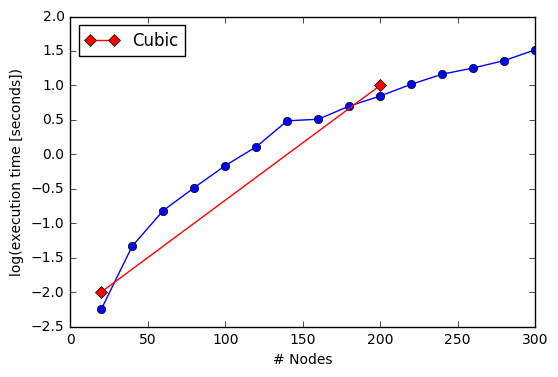

In [10]:
pylab.plot(node_array,time_array,marker='o')
pylab.xlabel('# Nodes')
pylab.ylabel('log(execution time [seconds])') 
twopts_x = [20,200]
twopts_y = [0.01,0.01*1000]
twopts_y = [ math.log(x,10.) for x in twopts_y ]
pylab.plot(twopts_x,twopts_y,marker='D',color='r',label='Cubic')
pylab.legend(loc='upper left')
pylab.show()

Does the time scale as $O(N^3)$?  Why or why not?

Next let's write the code to do a depth first search as a recursive function

In [11]:
def DFS(node,G,visited,verts):
# this function performs a depth first search from node 

    return visited

For simplicity, let's work with a single digraph of 50 vertices and 200 edges.  We need to set a vector visited which is initally all false.  Also count and print out the number of trees.

In [14]:
#verts = 4
#edges = 3
verts = 50
edges = 200
G = Digraph(verts,edges)
visited = [(i==0) for i in range(1,verts+1)]
#print(G)

trees = 0
for i in range(0,verts):
    if( not visited[i] ):
        if( i != 0 ):
            print(' ')
            print('-----')  # new tree on a new line
        trees = trees + 1
        DFS(i,G,visited,verts)        

print( '\nThis graph contains',trees,'trees.' )

0  2  4  9  19  24  26  5  6  15  21  8  47  10  17  23  25  12  14  37  42  35  44  34  43  31  39  41  33  48  27  30  22  32  40  28  3  13  38  7  45  29  46  36  49  18  11  16   
-----
1   
-----
20  
This graph contains 3 trees.


The next thing we want to do is write code for a graph, rather than a digraph.  This will proceed more or less the same as the function Digraph above, we just need to be sure to symmetrise about the diagonal

In [15]:
def Graph(N,E):

    return A

Try Floyd's algorithm on this.

In [16]:
C = Graph(5,5)
A = Floyds(C,5)

print('Cost array')
print(C)
print('-'*30)
print('Final cost array')
print(A)

Cost array
[[  0.  inf  inf  61.  45.]
 [ inf   0.  62.  94.  inf]
 [ inf  62.   0.  inf  87.]
 [ 61.  94.  inf   0.  inf]
 [ 45.  inf  87.  inf   0.]]
------------------------------
Final cost array
[[   0.  155.  132.   61.   45.]
 [ 155.    0.   62.   94.  149.]
 [ 132.   62.    0.  156.   87.]
 [  61.   94.  156.    0.  106.]
 [  45.  149.   87.  106.    0.]]


Let's switch to dynamic programming.  Let's start simple by revisiting a standard recursive solution to the factorial problem.

In [17]:
def factorial(n):
    if( n == 1 ):
        val = 1
    else:
        val = n * factorial(n-1)
    return val

print(factorial(5))

120


This is quite straightforward and clearly returns the correct result.  But let's now turn this into a new function, factorial2 which uses dynamic programming

In [18]:
# start by creating a zero array for storing computing factorials.  assume max n = 500
fac_array = np.zeros(500)

def factorial2(n):

    return val

print(factorial2(5))
print(fac_array[0:10])

120
[   0.    0.    2.    6.   24.  120.    0.    0.    0.    0.]


Let's do some timing experiments, to see which is faster.

In [19]:
start_time = time.time()
for i in range(0, 1000):
    factorial(100)
end_time = time.time()
print('1000 iterations took',end_time-start_time,'seconds with factorial')

start_time = time.time()
for i in range(0, 1000):
    factorial2(100)
end_time = time.time()
print('1000 iterations took',end_time-start_time,'seconds with factorial2')

1000 iterations took 0.026780128479003906 seconds with factorial
1000 iterations took 0.0008120536804199219 seconds with factorial2


Let's now write the code for the 0-1 knapsack problem.  Solve the example given in class of 5 boxes.

In [198]:
def knapsack(v,w,N,max_W):

    return V[N-1,max_W-1],K

In [203]:
v = np.array((1,2,2,4,10))
w = np.array((1,1,2,12,4))
items = {0:'Red box', 1:'Grey box', 2:'Blue box', 3:'Green box', 4:'Yellow box'}
V,tK = knapsack(v,w,5,15)
print(V)
print('Items chosen:')
K = 14
for i in range(4,-1,-1):
    if( tK[i,K] ):
        print(items[i])
        K = K - w[i]

15
Items chosen:
Yellow box
Blue box
Grey box
Red box
